# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *D*

**Names:**

* Emma Lejal Glaude
* Marc Bickel
* Cyril Cadoux

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [2]:
def build_and_analyze(path) :

    G = nx.Graph()

    file = open(path, 'r')


    for line in file:

        #Don't read the first 2 lines
        if (line[0] != '#') : 

            #Split the line into 2 nodes
            nodes = line.split(',')

            #Get rid of the '\n' char at the end of each line
            G.add_edge(nodes[0], nodes[1].split('\n')[0])


    file.close()

    print("Number of nodes :", len(G.nodes()))

    print("Number of edges :", len(G.edges()))

    return G

In [3]:
G = build_and_analyze('../data/network1.csv')

Number of nodes : 13033
Number of edges : 18584


#### Exercise 2.2:  Node degree distribution

#### 2.2.1
The kind of plot we think would be most useful for this kind of task is a repartition of the number of nodes (y-axis) with respect to their degree (x-axis). We will thus use a histogram.
#### 2.2.2

The mean of connections per node is :  2.85183764291

The number of connexions of the 15 most popular nodes:
 [1482, 1083, 691, 619, 467, 455, 379, 300, 292, 248, 225, 216, 207, 194, 168]


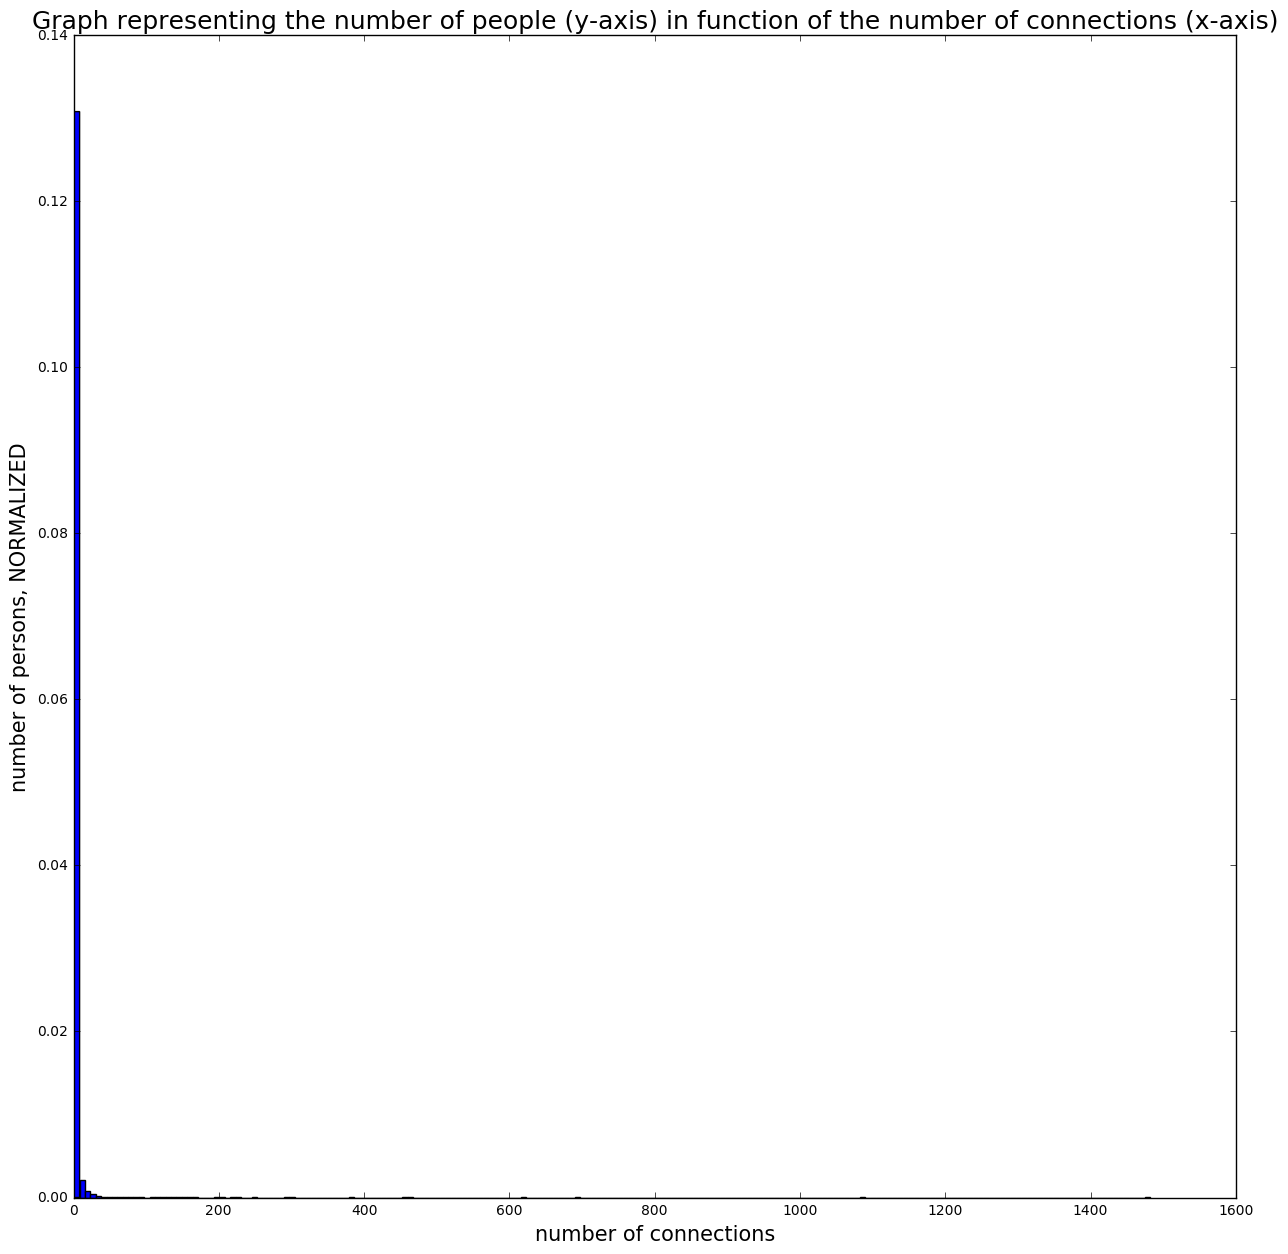

In [4]:
# ========== Plot Parameters ==========

plt.figure(figsize=(15,15))
plt.xlabel("number of connections", fontsize = 15)
plt.ylabel("number of persons, NORMALIZED", fontsize = 15)
plt.title("Graph representing the number of people (y-axis) in function of the number of connections (x-axis)", fontsize = 18)


# ========== Extracting nb_connections ==========

# x is a dictionnary with the following mapping : node_id => number of connection
dico_id_nb = nx.degree(G)
# val is the list containing all the nb of connections
nb_connections = list(dico_id_nb.values())


# ========== Answering questions ==========

print("The mean of connections per node is : ", np.mean(nb_connections))

print("\nThe number of connexions of the 15 most popular nodes:\n",
     sorted(nb_connections, reverse = True)[:15])
      

# ========== Plot a normalized histogram (to highlight the exponential law) ==========

un_used = plt.hist(nb_connections, normed = True, bins = 200)

We can see that some of the properties of the distribution are:
* No numbers is negative (obviously)
* It decreases quite fast, at an exponential rate
* There are 2 very connected nodes (1482 & 1083 connections) that seem to be two "cores" of the graph

---


#### 2.2.3

When we normalize the graph, we see that the distribution is close to an exponential distribution. We also see that the mean of the number of connection is ~2.75. We can thus approximate this distribution by an exponential random variable with parameter (lambda = 1/2.75)

#### Exercise 2.3: Giant component

In [5]:
def giant_component_analysis(graph) :

    # ========== Extracting Connected Components (sorted by len(gth)) ==========

    GCC = sorted(nx.connected_components(graph), key = len, reverse=True)


    # ========== Extracting the length of each CC ==========

    comp_sizes = list()
    for c in GCC:
        comp_sizes.append(len(c))


    # ========== Answering questions ==========

    print('Number of connected components : ', len(GCC))
    print('We can see that there is a giant component as the biggest component has size', len(GCC[0]))
    print('and the second largest component only has size', len(GCC[1]))

In [6]:
giant_component_analysis(G)

Number of connected components :  192
We can see that there is a giant component as the biggest component has size 12576
and the second largest component only has size 16


We can then conclude that there is one, and one only, giant component, which englobes ${12576} \over {13033}$ nodes, which is more than 96% of the graph. 



#### Exercise 2.4: Short paths & Small-worlds

In [16]:
# ======== Run this only once ! ========
shortest_paths_lengths = nx.all_pairs_shortest_path_length(G)

In [14]:
def mean_co_number(s_p_l):
    
    
    # ========== Creation of a list that we can easily work on ==========

    #items is a list of tuples, each tuple is defined like this :
    #Each element e is a tuple (starting_node, dict(ending_node => number of connections needed to reach starting_node))

    items = list(s_p_l.items())


    # ========== Computation of the Average ==========

    number_of_values = 0
    global_sum = 0


    # Work on the ...

    for e in items:                              #... e_th tuple of the list,
        partial_vals = list(e[1].values())       #...second elem of the tuple, values of the dictrionnary

        # At this point, partial_vals is a list of 'number of steps' that  all the nodes connected to e[0] need in order 
        # to reach it.

        global_sum += np.sum(partial_vals) # add all those number
        number_of_values += len(partial_vals) # add the 'weight' of those numbers

    print("The mean of all connections between two nodes is ", float(global_sum/number_of_values))

In [45]:
mean_co_number(shortest_paths_lengths)

The mean of all connections between two nodes is  4.175127915959493


We think it is effectively a small-world, since the mean of the degrees of separation is inferior to 6. 

---
#### Exercise 2.5: Network comparison

In [7]:
# ========== A new graph H ==========
H = build_and_analyze('../data/network2.csv')

Number of nodes : 26542
Number of edges : 43516


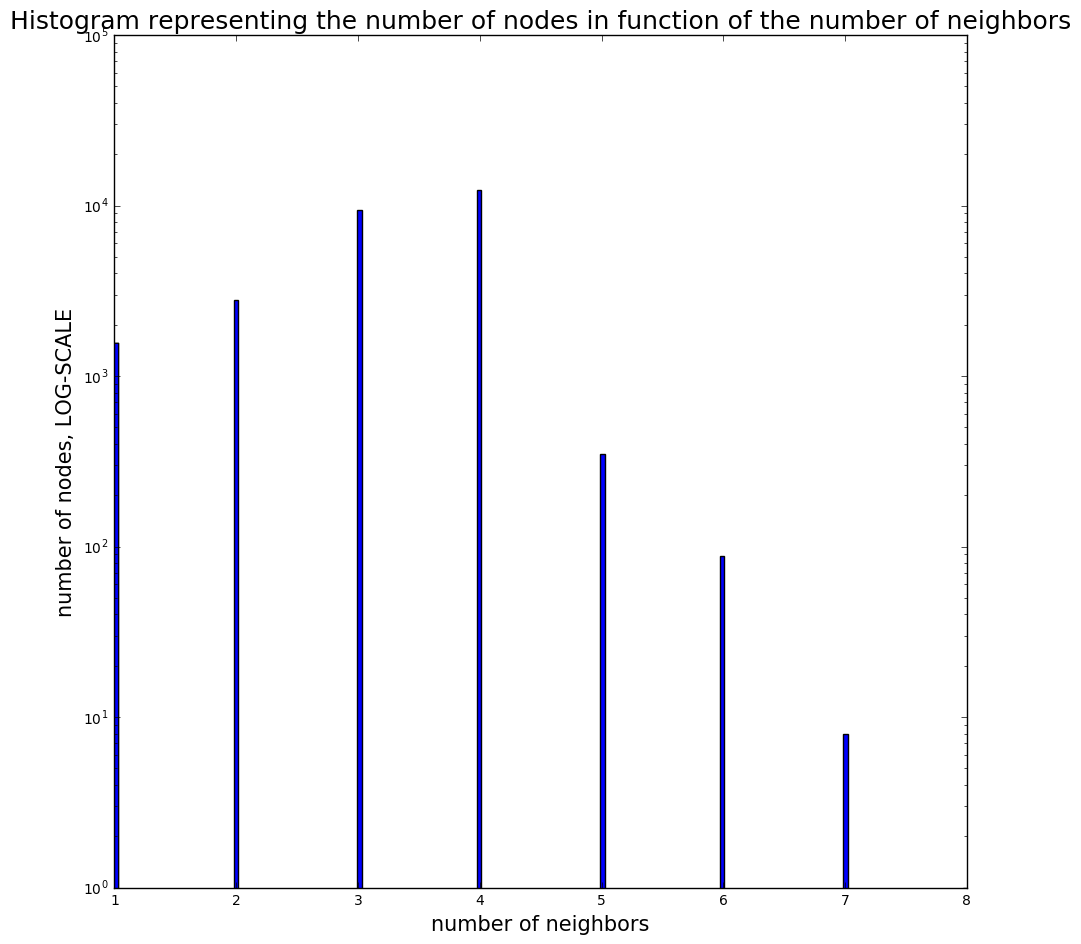

In [8]:
# ========== Plot the graph global degree ==========

plt.figure(figsize=(11,11))
plt.xlabel("number of neighbors", fontsize = 15)
plt.ylabel("number of nodes, LOG-SCALE", fontsize = 15)
plt.title("Histogram representing the number of nodes in function of the number of neighbors", fontsize = 18)


unused = plt.hist(list(nx.degree(H).values()), bins= 200, log = True)

In [9]:
giant_component_analysis(H)

Number of connected components :  5
We can see that there is a giant component as the biggest component has size 26481
and the second largest component only has size 30


___


In [10]:
#Run this cell only once !!
shortest_paths_lengths_H = nx.all_pairs_shortest_path_length(H)

In [15]:
mean_co_number(shortest_paths_lengths_H)

The mean of all connections between two nodes is  97.55320155456225


---

This second network is really different from the first one.

The first one has 18000 links and 13000 nodes and the second one has 43000 and 26000, we are in order of magnitude talking about a twice as big network.

However the second graph which is bigger only has 5 components against almost 200 for the first one. 
We can see that the bigger the graph, the more it is connected and looks like a Giant Component.

Regarding the degrees of the nodes, the two graphs have a completely different distribution. What we approximated as a decreasing exponential with graph n°1 is more of a gaussian on a very limited number of values of degrees.

Indeed the maximum degree of the first graph is over 1400 whereas the maximum degree of the second graph is 8.
In regards of the "small world" property, the second graph doesn't not meet the condition to be one. Indeed the the average number of connexions to join any 2 points of the graph is 97.55 which is way above the criteria of 6.

#### Exercise 2.6: Network identification

Our guess is that the first graph represents the subgraph of the routers as it is possible to have one central router with more than a thousand connexions.

Following the argument of the degree of a node, considering intersections of roads, we can hardly imagine 2 intersections with more than 8 roads in common, so the second graph has to be the one of the roads of New York